Market Approval Dates US

1. Get all drugs by scraping the WHO website for all drugs starting with N06A (antidepressants)
2. Download the 'orange book' from the FDA website and open the products.txt file with the approval date
3. Filter for antidepressants and retrieve approval date
4. Plot the approval dates on a timeline


# Get the relevant drugs from WHO website


In [1]:
%cd '/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection'

/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection


In [2]:
import sys

sys.path.append("02_AllThingsData/Utils/DataRetrieval/WHO-ATC-Scraper")

from WHO_ATC_Scraper import ATCScraper

In [3]:
atc_scraper = ATCScraper()
atc_scraper.fetch_data()
atc_scraper.scrape_and_store_data()

# Now, 'atc_scraper.dataframes_dict' contains DataFrames for each linked page
# You can access them using the href text as keys
for key, value in atc_scraper.dataframes_dict.items():
    print("")
    print(f"Key: {key}")
    print("")
    print(value)  # Print the DataFrame

# list of all unique drugs
all_drugs = []
for data in atc_scraper.dataframes_dict.values():
    all_drugs += data["Name"].tolist()
all_drugs = list(set(all_drugs))

NameError: name 'io' is not defined

### 2. Download the 'orange book' from the FDA website and open the products.txt file with the approval date


In [ ]:
sys.path.append("02_AllThingsData/Utils/DataRetrieval/FDA_BirthDates")
from FDAZipFileLoader import FDAZipFileLoader

In [ ]:
zip_url = "https://www.fda.gov/media/76860/download?attachment"

# Define the name of the file you want to extract
desired_file_name = "products.txt"

# Create an instance of the FDAZipFileLoader
loader = FDAZipFileLoader(zip_url, desired_file_name)

# Load the data
df = loader.load_data()
df.head()

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
0,BUDESONIDE,"AEROSOL, FOAM;RECTAL",BUDESONIDE,PADAGIS ISRAEL,2MG/ACTUATION,A,215328,1,AB,2023-04-12,No,No,RX,PADAGIS ISRAEL PHARMACEUTICALS LTD
1,BUDESONIDE,"AEROSOL, FOAM;RECTAL",UCERIS,SALIX,2MG/ACTUATION,N,205613,1,AB,2014-10-07,Yes,Yes,RX,SALIX PHARMACEUTICALS INC
2,MINOCYCLINE HYDROCHLORIDE,"AEROSOL, FOAM;TOPICAL",AMZEEQ,JOURNEY,EQ 4% BASE,N,212379,1,NaN,2019-10-18,Yes,Yes,RX,JOURNEY MEDICAL CORP
3,AZELAIC ACID,"AEROSOL, FOAM;TOPICAL",AZELAIC ACID,TEVA PHARMS USA,15%,A,210928,1,NaN,2020-10-07,No,No,DISCN,TEVA PHARMACEUTICALS USA INC
4,BETAMETHASONE VALERATE,"AEROSOL, FOAM;TOPICAL",BETAMETHASONE VALERATE,NOVAST LABS,0.12%,A,207144,1,NaN,2017-05-24,No,No,DISCN,NOVAST LABORATORIES LTD


### 3. Filter for antidepressants and retrieve approval date


In [ ]:
drug_approval_dict = {}
drug_not_found = []
for drug in all_drugs:
    df_temp = df[df["Ingredient"].apply(lambda x: drug in x.lower())]
    if len(df_temp) == 0:
        drug_not_found.append(drug)
        # print(f'{drug} not found')
    else:
        # print(f'{drug} found')
        df_temp.sort_values(by="Approval_Date", inplace=True)
        drug_approval_dict[drug] = df_temp.iloc[0]["Approval_Date"].year

print("These drugs were not found in the FDA database:")
print(drug_not_found)
drug_approval_dict

/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_12246/610527327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.sort_values(by="Approval_Date", inplace=True)


These drugs were not found in the FDA database:
['tianeptine', 'imipramine oxide', 'amineptine', 'Hyperici herba', 'butriptyline', 'alaproclate', 'opipramol', 'dibenzepin', 'lofepramine', 'nialamide', 'mianserin', 'moclobemide', 'gepirone', 'dimetacrine', 'medifoxamine', 'minaprine', 'etoperidone', 'oxaflozane', 'bifemelane', 'reboxetine', 'melitracen', 'agomelatine', 'oxitriptan', 'iproclozide', 'quinupramine', 'tryptophan', 'nomifensine', 'zimeldine', 'dosulepin', 'iprindole', 'toloxatone', 'iproniazide', 'pivagabine']


{'esketamine': 2019,
 'milnacipran': 2009,
 'desipramine': 1982,
 'trazodone': 1985,
 'trimipramine': 1982,
 'doxepin': 1986,
 'bupropion': 1985,
 'venlafaxine': 1993,
 'desvenlafaxine': 2008,
 'paroxetine': 1992,
 'escitalopram': 2002,
 'viloxazine': 2021,
 'tranylcypromine': 1985,
 'amoxapine': 1989,
 'citalopram': 1998,
 'vortioxetine': 2013,
 'fluoxetine': 1987,
 'nefazodone': 1994,
 'amitriptyline': 1982,
 'phenelzine': 2010,
 'protriptyline': 1995,
 'imipramine': 1982,
 'fluvoxamine': 1994,
 'mirtazapine': 1996,
 'nortriptyline': 1992,
 'levomilnacipran': 2013,
 'brexanolone': 2019,
 'sertraline': 1991,
 'maprotiline': 1982,
 'duloxetine': 2004,
 'clomipramine': 1989,
 'vilazodone': 2011,
 'isocarboxazid': nan}

## 4. Plot the approval dates on a timeline


In [11]:
sys.path.append("02_AllThingsData/Utils/Plotting")
from MA_TimelinePlot import BirthYearTimelinePlotter

import pandas as pd

In [12]:
# Prepare df
drug_approval_df = pd.DataFrame(
    drug_approval_dict.items(), columns=["DrugName", "BirthYear"]
)

# Drop NA values and print removed drugs
dropped_drugs = drug_approval_df.loc[
    drug_approval_df["BirthYear"].isna(), "DrugName"
].tolist()
print(f"Drugs dropped without birth year: {', '.join(dropped_drugs)}")
drug_approval_df.dropna(inplace=True)

# Convert "BirthYear" to year format
drug_approval_df["BirthYear"] = pd.to_datetime(
    drug_approval_df["BirthYear"], format="%Y"
).dt.year

# Sort by birth year and then alphabetically
drug_approval_df.sort_values(by=["BirthYear", "DrugName"], inplace=True)
drug_approval_df.reset_index(drop=True, inplace=True)

# Display the first 3 rows of the processed DataFrame
drug_approval_df.head(3)

Drugs dropped without birth year: isocarboxazid


,DrugName,BirthYear
0,amitriptyline,1982
1,desipramine,1982
2,imipramine,1982


# add colors


In [14]:
# load color df
color_df = pd.read_csv("02_AllThingsData/Utils/Plotting/Data/ColorPalettes_PerATC.csv")

merged_df = pd.merge(drug_approval_df, color_df, on="DrugName")

df_plotting = merged_df[["DrugName", "DrugClass", "BirthYear", "Color", "ColorPalette"]]
df_plotting.to_csv(
    "02_AllThingsData/MA-US-Based/Data/US_MA_Drugs_For_Plotting.csv",
    index=False,
)

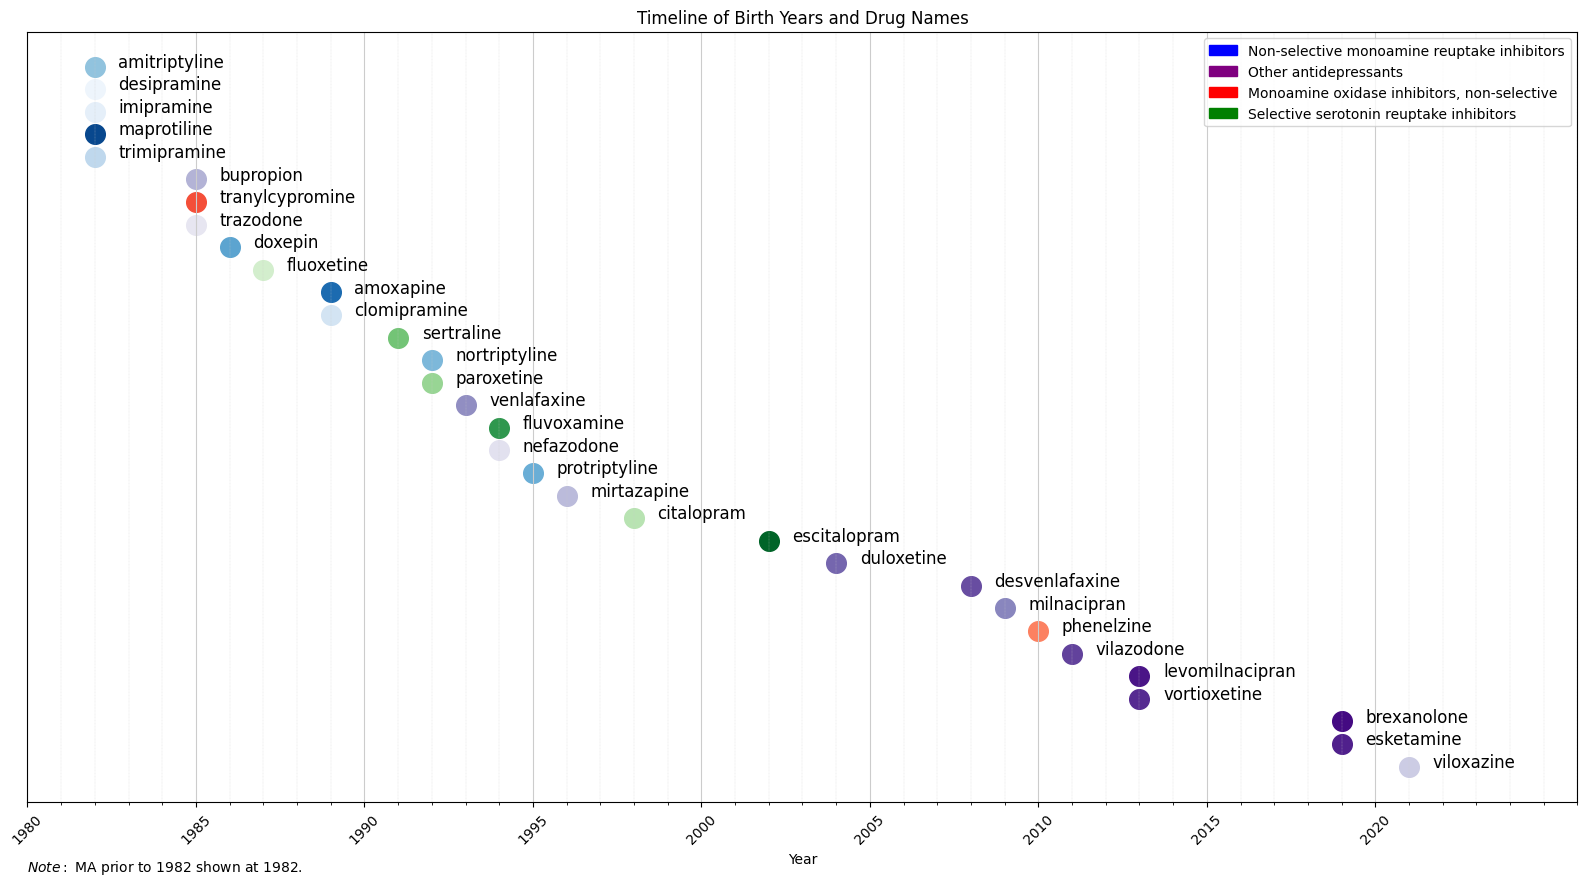

In [15]:
plotter = BirthYearTimelinePlotter(df=df_plotting, style=1)
plotter.plot_birth_year_timeline(
    save_path="02_AllThingsData/MA-US-Based/imgs/MA-USBased-timeline_plot_1.png",
    show_note=True,
    note_text="MA prior to 1982 shown at 1982.",
)